#                                                  RESUME ANALYSIS

Resume Analysis is the primary step in the hiring process. It evaluates the 
candidates resumes and determines whether they are qualified for a role based on 
their education, skill sets, technical stuff, experience, and other information captured 
in their resume. It is a crucial step in the process of hiring.To make it simple,it's a form of pattern that matches the job 
requirement and the candidate's qualifications based on their resume.

# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import PyPDF2
from PyPDF2 import PdfFileReader 
 

import re
import string
import os
from os import listdir
from os.path import isfile, join
import collections

import gensim 
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from gensim.models.phrases import Phraser, Phrases
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

# READING RESUMES FROM THE FOLDER

Dataset for Resume Analysis is collected manually by own from surroundings 
environment. I have collected set of resumes from friends and save 
into one folder as pdf format.

For preparation I have convert pdf to text by importing PyPDF2 extract text 
library function. It is a python library used for performing major tasks on PDF files.
Reading files from folder using os.path.join().

In [3]:
file_path='C:\\Users\\admin\\Desktop\\Imarticus\\Resume'

In [4]:
myfiles = [os.path.join(file_path, f) for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]
myfiles


['C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Aarthi.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Abishekekumar A.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\ANITHA S.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Charumathi C.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Deepika.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Gowri J.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Harish.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\HEMAPRABHA K.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\KARTHIKEYAN R.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\KAVIYA K K.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\KAWIN D.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Kesavan S.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Logapriya.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\MANJU.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Resume\\Mounika.pdf',
 'C:\\Users\\admin\\Desktop\\Imarticus\\Re

In [5]:
names=[]
for f in os.listdir(file_path):
        names.append(f.replace(".pdf",""))
print(names)

['Aarthi', 'Abishekekumar A', 'ANITHA S', 'Charumathi C', 'Deepika', 'Gowri J', 'Harish', 'HEMAPRABHA K', 'KARTHIKEYAN R', 'KAVIYA K K', 'KAWIN D', 'Kesavan S', 'Logapriya', 'MANJU', 'Mounika', 'PRATHIKSHA', 'PRAVEENA', 'RITHIKA', 'SHUBIKSHA P', 'SINEGALATHA', 'Sowmya', 'SUGANTHIKA R', 'Sureka', 'Yash']


# EXTRACTING TEXT FROM PDF

In [6]:
def pdfextract(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    number_of_pages = read_pdf.getNumPages()
    c = collections.Counter(range(number_of_pages))
    for i in c:
        #page
        page = read_pdf.getPage(i)
        page_content = page.extractText()
    return (str(page_content))

In [7]:
li=[]
for i in myfiles:
    li.append(pdfextract(i))
li

['Area\n \nof\n \nSpecialization\n \n\n➢\n \nDBMS\n \n\n➢\n \nMachine Learning\n \n\n \n\nSoftware\n \nSkills\n \n\n•\n \nHTML &CSS\n \n\n•\n \nC Programming\n \n\n \nOnline Certifications\n  \n\n➢\n \nCompleted Html and CSS course for Beginners by Udemy\n  \n\n➢\n \nComplet\ned Machine Learning (“Linear Regression”) by Wipro Future skills\n  \n\n➢\n \nCompleted online courses offered by Ict learnathon in 2020\n  \n\n \nCo\n-\nCurricular Participations\n  \n\n➢\n \nParticipated in “Accenture Innovation Challenge”\n  \n\n➢\n \nParticipated in “Coding Ninjas” conducted by CodeKaze\n  \n\n➢\n \nAttended a webinar on “Cloud Master class \n -\nDiscovery Day”\n \n\n➢\n \nAttended a webinar on “Opportunities for Freshers in the Data science Industry” \n\nconducted by Imarticus\n  \n\n➢\n \nAttended a workshop on “Block Chain using Python” conducted by Pantech e\n-\n\nlearning\n \n\n➢\n \nActive  membe\nr  in  Quiz  club  (2020)  ,  Math  club  (2021)  at    M.  Kumarasamy \n\nCollege of Engin

# CREATING DATAFRAME

Creating dataframe to make analyse easy and make user to understand the data 


In [8]:
df=pd.DataFrame(li,columns=['resume_data'])

In [9]:
df["candidate_name"]=names

In [10]:
df.reset_index(inplace=True)
    

In [11]:
df.rename(columns={'index':'resume_id'},inplace=True)
df

,resume_id,resume_data,candidate_name
0,0,Area\n \nof\n \nSpecialization\n \n\n➢\n \nDBM...,Aarthi
1,1,"\n\nAddress:512\n-\nAnandhavar Nagar, Trichy ...",Abishekekumar A
2,2,\n\nCAPSTONE \nPROJECT\n:\n \n\nProject Title...,ANITHA S
3,3,\n\nProject Title: \nBlack Friday Dataset\n ...,Charumathi C
4,4,\n\n \n \nCOURSE COMPLETION\n \n\n \n ...,Deepika
5,5,\n\nMINOR PROJECT\nS\n \n \n\n \n\n1.\n \nPro...,Gowri J
6,6,"I, Harish K, hereby declare that all the detai...",Harish
7,7,\n\n \n\n \n \n\nCAPSTONE PROJECT\n \n\nProj...,HEMAPRABHA K
8,8,\n\n \n\n \n \n\n \n \n...,KARTHIKEYAN R
9,9,\n\nMINI PROJEC\nTS\n \n\n \n\nProject Title:...,KAVIYA K K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resume_id       24 non-null     int64 
 1   resume_data     24 non-null     object
 2   candidate_name  24 non-null     object
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


# CLEANING RESUME DATA AND NATURAL LANGUAGE PROCESSING

## TOKENIZATION, CLEANING AND STOPWORD REMOVAL

Clean text often means a list of words or tokens that we can work 
with in our models. This means converting the raw text into a list of words and 
saving it again. It is a way to split the document by white space, including ” “, new 
lines, tabs and more.

Tokenization :
    A sentence or data can be split into words using the method word_tokenize()
<br>
StopWords :
    Stop words can be filtered from the text to be processed.Text may contain stop words like ‘the’, ‘is’, ‘are’.
    
    

In [13]:
x=[]
for line in df['resume_data']:
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    x.append(words)
    print(x)
 

[['area', 'specialization', 'dbms', 'machine', 'learning', 'software', 'skills', 'html', 'css', 'c', 'programming', 'online', 'certifications', 'completed', 'html', 'css', 'course', 'beginners', 'udemy', 'complet', 'ed', 'machine', 'learning', 'linear', 'regression', 'wipro', 'future', 'skills', 'completed', 'online', 'courses', 'offered', 'ict', 'learnathon', 'co', 'curricular', 'participations', 'participated', 'accenture', 'innovation', 'challenge', 'participated', 'coding', 'ninjas', 'conducted', 'codekaze', 'attended', 'webinar', 'cloud', 'master', 'class', 'discovery', 'day', 'attended', 'webinar', 'opportunities', 'freshers', 'data', 'science', 'industry', 'conducted', 'imarticus', 'attended', 'workshop', 'block', 'chain', 'using', 'python', 'conducted', 'pantech', 'e', 'learning', 'active', 'membe', 'r', 'quiz', 'club', 'math', 'club', 'kumarasamy', 'college', 'engineering', 'linguistic', 'fluency', 'tamil', 'english', 'read', 'write', 'speak', 'hindi', 'read', 'write', 'declar

# REMOVING MEANINGLESS STRING

Here I used remove the unnecessary and meaningless words to make resume data as clean.

In [14]:
ls=["xe","xa","x","e"]
xmega=[]
xc=[]
for value in x:
    for i in value:
        if i not in ls:
            xc.append(i)
    xmega.append(xc)
    xc=[]

In [15]:
x_cleaned=[]
for i in xmega:
    if i not in x_cleaned:
         x_cleaned.append(i)
print(x_cleaned)

[['area', 'specialization', 'dbms', 'machine', 'learning', 'software', 'skills', 'html', 'css', 'c', 'programming', 'online', 'certifications', 'completed', 'html', 'css', 'course', 'beginners', 'udemy', 'complet', 'ed', 'machine', 'learning', 'linear', 'regression', 'wipro', 'future', 'skills', 'completed', 'online', 'courses', 'offered', 'ict', 'learnathon', 'co', 'curricular', 'participations', 'participated', 'accenture', 'innovation', 'challenge', 'participated', 'coding', 'ninjas', 'conducted', 'codekaze', 'attended', 'webinar', 'cloud', 'master', 'class', 'discovery', 'day', 'attended', 'webinar', 'opportunities', 'freshers', 'data', 'science', 'industry', 'conducted', 'imarticus', 'attended', 'workshop', 'block', 'chain', 'using', 'python', 'conducted', 'pantech', 'learning', 'active', 'membe', 'r', 'quiz', 'club', 'math', 'club', 'kumarasamy', 'college', 'engineering', 'linguistic', 'fluency', 'tamil', 'english', 'read', 'write', 'speak', 'hindi', 'read', 'write', 'declaration

## LEMMATIZATION

In [16]:
wn = WordNetLemmatizer() 

In [17]:
lem_words=[]
for word in x_cleaned:
    for i in word:
        i=wn.lemmatize(i)
        lem_words.append(i)

In [18]:
same=0
diff=0
for i in range(0,24):
    if(lem_words[i]==x_cleaned[i]):
        same=same+1
    elif(lem_words[i]!=x_cleaned[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 24
Number of words not Lemmatized= 0


In [19]:
res=' '.join([i for i in lem_words if not i.isdigit()])


Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. To understand how most people think about the datata, that we can visualize a word cloud of that column.
Here i used to visulaize a word cloud of reumse data cloumn.

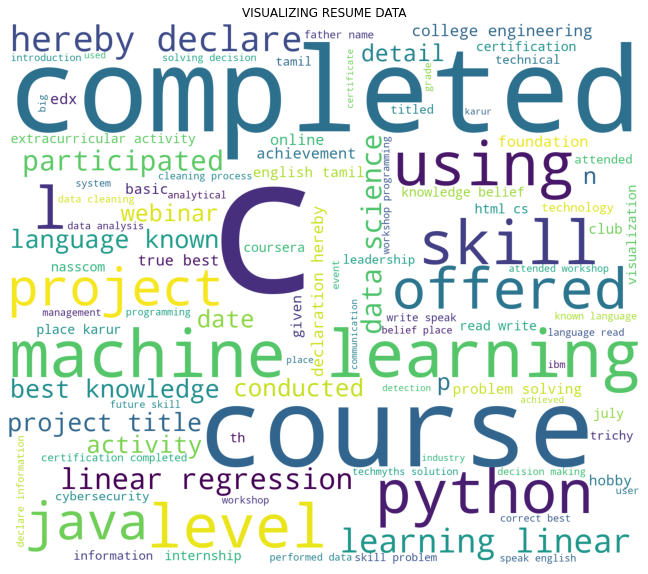

In [20]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('VISUALIZING RESUME DATA')
plt.axis('off')
plt.show()


# COMPANY'S REQUIRED SKILLS DATA

In [21]:
file=open(r"C:\Users\admin\skillset.txt",'r')
skills=[]
for line in file:     
        for word in line.split():         
            skills.append(word) 
print(skills)
length=len(skills)

['dbms', 'machine', 'learning', 'software', 'skills', 'html', 'css', 'c', 'programming', 'cisco', 'networking', 'academy', 'hackathon', 'deep', 'sql', 'bigdata', 'big', 'data', 'hadoop', 'spark', 'powerbi', 'tableau', 'bootsrap', 'javascript', 'java', 'communucation', 'python', 'scilab', 'webinar', 'workshop', 'digital', 'nasscom', 'cloud', 'cyber', 'security', 'computing', 'analytics', 'algorithm', 'analyse', 'manufacturing', 'printing', 'tamil', 'english', 'mobile', 'web', 'development', 'internship', 'aicte', 'eduskills', 'cybersecurity', 'apache', 'hadoop', 'apache', 'cassandra', 'mongodb', 'apache', 'hive', 'quick', 'learner', 'punctual', 'time', 'management', 'aws', 'linux', 'edx', 'communication', 'hindi']


In [22]:
skillset=' '.join([i for i in skills if not i.isdigit()])

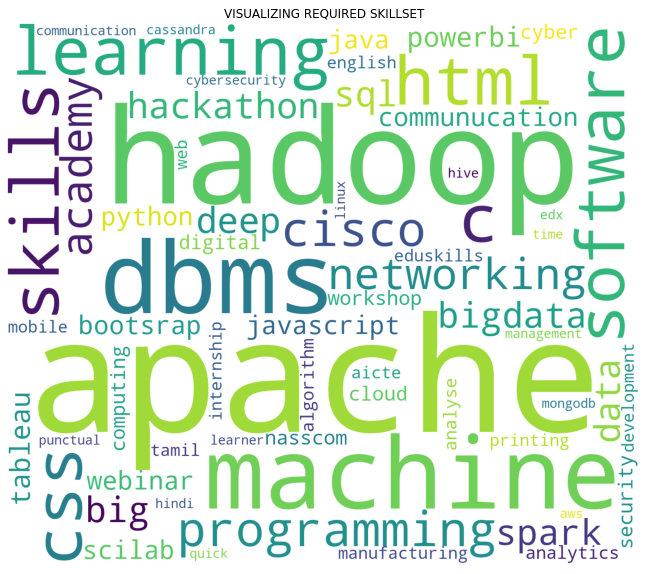

In [23]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(skillset)
plt.imshow(wordcloud)
plt.title('VISUALIZING REQUIRED SKILLSET')
plt.axis('off')
plt.show()

# VALIDATING RESUME DATA WITH COMPANY'S REQUIRED SKILLS 

In [24]:
val=[]
for i in x_cleaned:
    count=0
    for y in i:
        if y in skills:
            count+=1
    a=int((count/length)*100)
    val.append(a)
print(val)
            
        

[35, 13, 31, 11, 32, 35, 16, 19, 25, 23, 29, 20, 40, 10, 73, 16, 56, 46, 8, 16, 10, 28, 32, 5]


In [25]:
df['validation_percentage']=val

In [26]:
df

,resume_id,resume_data,candidate_name,validation_percentage
0,0,Area\n \nof\n \nSpecialization\n \n\n➢\n \nDBM...,Aarthi,35
1,1,"\n\nAddress:512\n-\nAnandhavar Nagar, Trichy ...",Abishekekumar A,13
2,2,\n\nCAPSTONE \nPROJECT\n:\n \n\nProject Title...,ANITHA S,31
3,3,\n\nProject Title: \nBlack Friday Dataset\n ...,Charumathi C,11
4,4,\n\n \n \nCOURSE COMPLETION\n \n\n \n ...,Deepika,32
5,5,\n\nMINOR PROJECT\nS\n \n \n\n \n\n1.\n \nPro...,Gowri J,35
6,6,"I, Harish K, hereby declare that all the detai...",Harish,16
7,7,\n\n \n\n \n \n\nCAPSTONE PROJECT\n \n\nProj...,HEMAPRABHA K,19
8,8,\n\n \n\n \n \n\n \n \n...,KARTHIKEYAN R,25
9,9,\n\nMINI PROJEC\nTS\n \n\n \n\nProject Title:...,KAVIYA K K,23


In [27]:
df['status'] = df['validation_percentage'].apply(lambda x: 'selected' if x >= 25 else 'not_selected')

In [28]:
df

,resume_id,resume_data,candidate_name,validation_percentage,status
0,0,Area\n \nof\n \nSpecialization\n \n\n➢\n \nDBM...,Aarthi,35,selected
1,1,"\n\nAddress:512\n-\nAnandhavar Nagar, Trichy ...",Abishekekumar A,13,not_selected
2,2,\n\nCAPSTONE \nPROJECT\n:\n \n\nProject Title...,ANITHA S,31,selected
3,3,\n\nProject Title: \nBlack Friday Dataset\n ...,Charumathi C,11,not_selected
4,4,\n\n \n \nCOURSE COMPLETION\n \n\n \n ...,Deepika,32,selected
5,5,\n\nMINOR PROJECT\nS\n \n \n\n \n\n1.\n \nPro...,Gowri J,35,selected
6,6,"I, Harish K, hereby declare that all the detai...",Harish,16,not_selected
7,7,\n\n \n\n \n \n\nCAPSTONE PROJECT\n \n\nProj...,HEMAPRABHA K,19,not_selected
8,8,\n\n \n\n \n \n\n \n \n...,KARTHIKEYAN R,25,selected
9,9,\n\nMINI PROJEC\nTS\n \n\n \n\nProject Title:...,KAVIYA K K,23,not_selected


<b>Interesting.I have collected nearly 24 resumes and validated it with required skillset.
By looking at the validation_percentage column in the dataframe, I created a new column defining the selection status of the canditate by fixing a threshold value.
(i.e) if resume data matches with company's required skillset at values above 25% the candidate's resume will be selected or else the resume will be rejected.</b>


# EXPLORATORY DATA ANALYSIS

In [29]:
df.head()

,resume_id,resume_data,candidate_name,validation_percentage,status
0,0,Area\n \nof\n \nSpecialization\n \n\n➢\n \nDBM...,Aarthi,35,selected
1,1,"\n\nAddress:512\n-\nAnandhavar Nagar, Trichy ...",Abishekekumar A,13,not_selected
2,2,\n\nCAPSTONE \nPROJECT\n:\n \n\nProject Title...,ANITHA S,31,selected
3,3,\n\nProject Title: \nBlack Friday Dataset\n ...,Charumathi C,11,not_selected
4,4,\n\n \n \nCOURSE COMPLETION\n \n\n \n ...,Deepika,32,selected


In [30]:
df.tail()

,resume_id,resume_data,candidate_name,validation_percentage,status
19,19,\n\n \n\nINTERNSHIP\n \n\n \n\n1.\n \nDesigna...,SINEGALATHA,16,not_selected
20,20,Completed Business English preliminary exam ...,Sowmya,10,not_selected
21,21,SUGANTHIKA R\n\nP : 7010554343\nE : suganthika...,SUGANTHIKA R,28,selected
22,22,ONLINE COURSES\nDECLARATION\nINTERPERSONAL\nSK...,Sureka,32,selected
23,23,\n\nCompany: \nInsplore Consultants pvt. ltd....,Yash,5,not_selected


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   resume_id              24 non-null     int64 
 1   resume_data            24 non-null     object
 2   candidate_name         24 non-null     object
 3   validation_percentage  24 non-null     int64 
 4   status                 24 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.1+ KB


In [32]:
df1=df.drop(['resume_id'],axis=1)

In [33]:
df1.shape

(24, 4)

In [34]:
df1.describe()

,validation_percentage
count,24.000000
mean,26.208333
std,16.207833
min,5.000000
25%,15.250000
50%,24.000000
75%,32.750000
max,73.000000


In [35]:
df1.isna().sum()

resume_data              0
candidate_name           0
validation_percentage    0
status                   0
dtype: int64

In [36]:
df1.duplicated().sum()

0

In [37]:
df["status"].value_counts()

selected        12
not_selected    12
Name: status, dtype: int64

# DATA VISUALIZATION

Text(0.5, 1.0, 'count of candidate selection status')

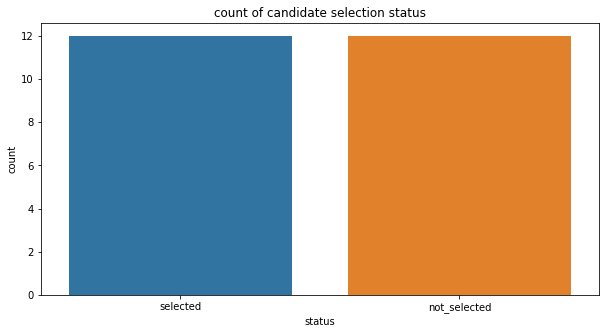

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(df['status'])
plt.title('count of candidate selection status')
 

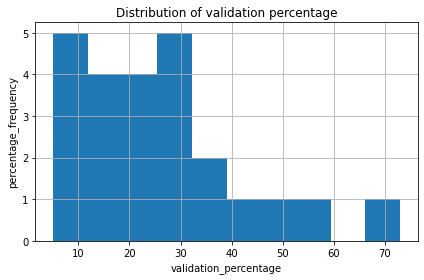

In [39]:

df["validation_percentage"].hist()
plt.xlabel("validation_percentage")
plt.ylabel("percentage_frequency")
plt.title("Distribution of validation percentage")
plt.tight_layout()
plt.show()

# IMPORTING MACHINE LEARNING LIBRARIES

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score

# DEFINING PIPELINE

In [41]:
def modelPipeline(X_train, X_test, y_train, y_test):

    log_reg = LogisticRegression()
    nb = BernoulliNB()
    knn = KNeighborsClassifier()
    svm = SVC()
    dt = DecisionTreeClassifier()
    et = ExtraTreesClassifier()
    rf = RandomForestClassifier()

    clfs = [
            ('Logistic Regression', log_reg), 
            ('Naive Bayes', nb),
            ('K-Nearest Neighbors', knn), 
            ('SVM', svm), 
            ('Decision Tree', dt), 
            ('Extra Trees', et), 
            ('Random Forest', rf), 
            ]


    pipelines = []

    scores_df = pd.DataFrame(columns=['Model', 'F1_Score', 'Precision', 'Recall', 'Accuracy', 'ROC_AUC'])


    for clf_name, clf in clfs:

        pipeline = Pipeline(steps=[
                                   ('scaler', StandardScaler()),
                                   ('classifier', clf)
                                   ]
                            )
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        fscore = skm.f1_score(y_test, y_pred)
        pres = skm.precision_score(y_test, y_pred)
        rcall = skm.recall_score(y_test, y_pred)  
        accu = skm.accuracy_score(y_test, y_pred)
        roc_auc = skm.roc_auc_score(y_test, y_pred)


        pipelines.append(pipeline)

        scores_df = scores_df.append({
                                      'Model' : clf_name,
                                      'F1_Score':fscore,
                                      'Precision' : pres,
                                      'Recall' : rcall,
                                      'Accuracy' : accu,
                                      'ROC_AUC' : roc_auc
                                      
                                      }, 
                                     ignore_index=True)
        
    return pipelines, scores_df

## TRAIN, TEST AND SPLIT

In [42]:
x=df1['validation_percentage'].values
y=df1['status']
y.replace("selected",1,inplace=True)
y.replace("not_selected",0,inplace=True)

In [43]:
x=x.reshape(-1,1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42 )

# FITTING DATA INTO PIPELINE

In [45]:
modelPipeline(x_train, x_test, y_train, y_test)

([Pipeline(steps=[('scaler', StandardScaler()),
                  ('classifier', LogisticRegression())]),
  Pipeline(steps=[('scaler', StandardScaler()), ('classifier', BernoulliNB())]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('classifier', KNeighborsClassifier())]),
  Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('classifier', ExtraTreesClassifier())]),
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('classifier', RandomForestClassifier())])],
                  Model  F1_Score  Precision    Recall  Accuracy   ROC_AUC
 0  Logistic Regression  0.857143       0.75  1.000000     0.875  0.900000
 1          Naive Bayes  0.800000       1.00  0.666667     0.875  0.833333
 2  K-Nearest Neighbors  1.000000       1.00  1.000000     1.000  1.000000
 3 

<B>For fitting a model using pipeline I have used various machine learning algorithms in which it predicts the accuracy and from that i have concluded that K-Nearest Neighbour classifier is best suited for training the model.<B>  

# USING K-Nearest Neighbor Classifier

In [46]:
model=KNeighborsClassifier().fit(x_train,y_train)


In [47]:
y_pred=model.predict(x_test)

# PREDICTION ANALYSIS

## CONFUSION MATRIX 

Define a function to plot the confusion matrix.


In [48]:
def plot_confusion_matrix(model):
    y_pred = model.predict(x_test)
    cm = skm.confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],\
                               index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['pink']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

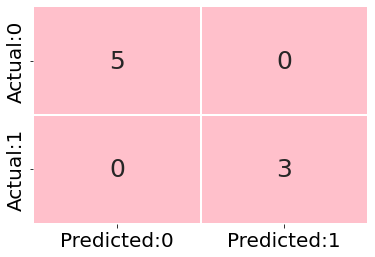

In [49]:
plot_confusion_matrix(model)

## CLASSIFICATION REPORT

In [50]:
print(skm.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## ROC CURVE

In [51]:
def plot_roc(model):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC Curve for Resume analysis', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred),4)))
    plt.grid(True)

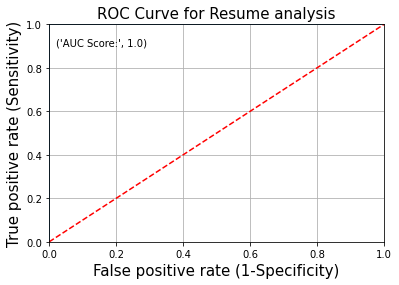

In [52]:
plot_roc(model)

## KAPPA SCORE

In [53]:
kappa_value = cohen_kappa_score(y_test,y_pred)
print('kappa score : ',kappa_value)

kappa score :  1.0


## ACCURACY SCORE

In [54]:
ac= skm.accuracy_score(y_test,y_pred)
print('Accuracy score : ',ac)

Accuracy score :  1.0


# PREDICTION

In [55]:
def predict(pred_file_path):
    line=pdfextract(pred_file_path)
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    count=0
    for i in words:
            if i in skills:
                count+=1
    a=int((count/length)*100)
    pred=model.predict([[a]])
    if pred==1:
        return "Hurrah!!!!!!!!! your resume is shortlisted"
    else:
        return "Sorry!!!!! your resume is rejected!"



In [56]:
predict(r"C:\Users\admin\Desktop\Imarticus\Resume\Gowri J.pdf")

'Hurrah!!!!!!!!! your resume is shortlisted'

# FLASK CONNECTIVITY


In [57]:
def predict(pred_file_path):
    line=pdfextract(pred_file_path)
    tokens=word_tokenize(line)
    tok=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    strpp=[w.translate(table) for w in tok]
    words=[word for word in strpp if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    count=0
    for i in words:
            if i in skills:
                count+=1
    a=int((count/length)*100)
    pred=model.predict([[a]])
    if pred==1:
        return "Hurrah!!!!!!!!! your resume is shortlisted"
    else:
        return "Sorry!!!!! your resume is rejected!"

In [61]:
from flask import Flask,render_template,request
app=Flask(__name__)
@app.route("/",methods=['GET', 'POST'])
def hello():
    return render_template('index.html')
@app.route("/file",methods=['GET', 'POST'])
def file():
    text = request.form['file']
    print(text)
    processed_text = predict(text)
    return render_template('output.html',answer=processed_text)
if __name__ == '__main__':
   app.run(debug = False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Aug/2022 11:46:49] "GET / HTTP/1.1" 200 -


C:\Users\admin\Desktop\Imarticus\Resume\Gowri J.pdf


127.0.0.1 - - [15/Aug/2022 11:48:53] "POST /file HTTP/1.1" 200 -
127.0.0.1 - - [15/Aug/2022 11:49:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Aug/2022 12:03:38] "POST /file HTTP/1.1" 200 -


C:\Users\admin\Desktop\Imarticus\Resume\Gowri J.pdf


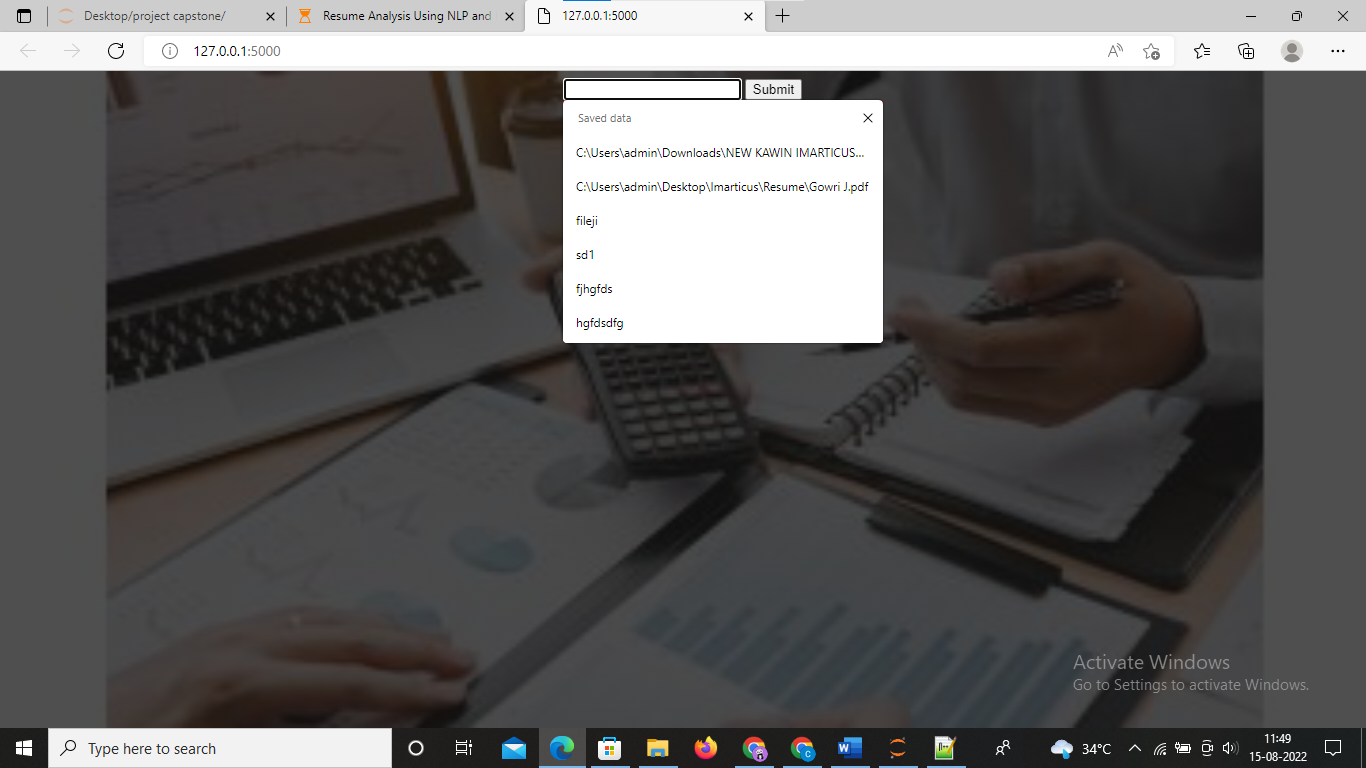

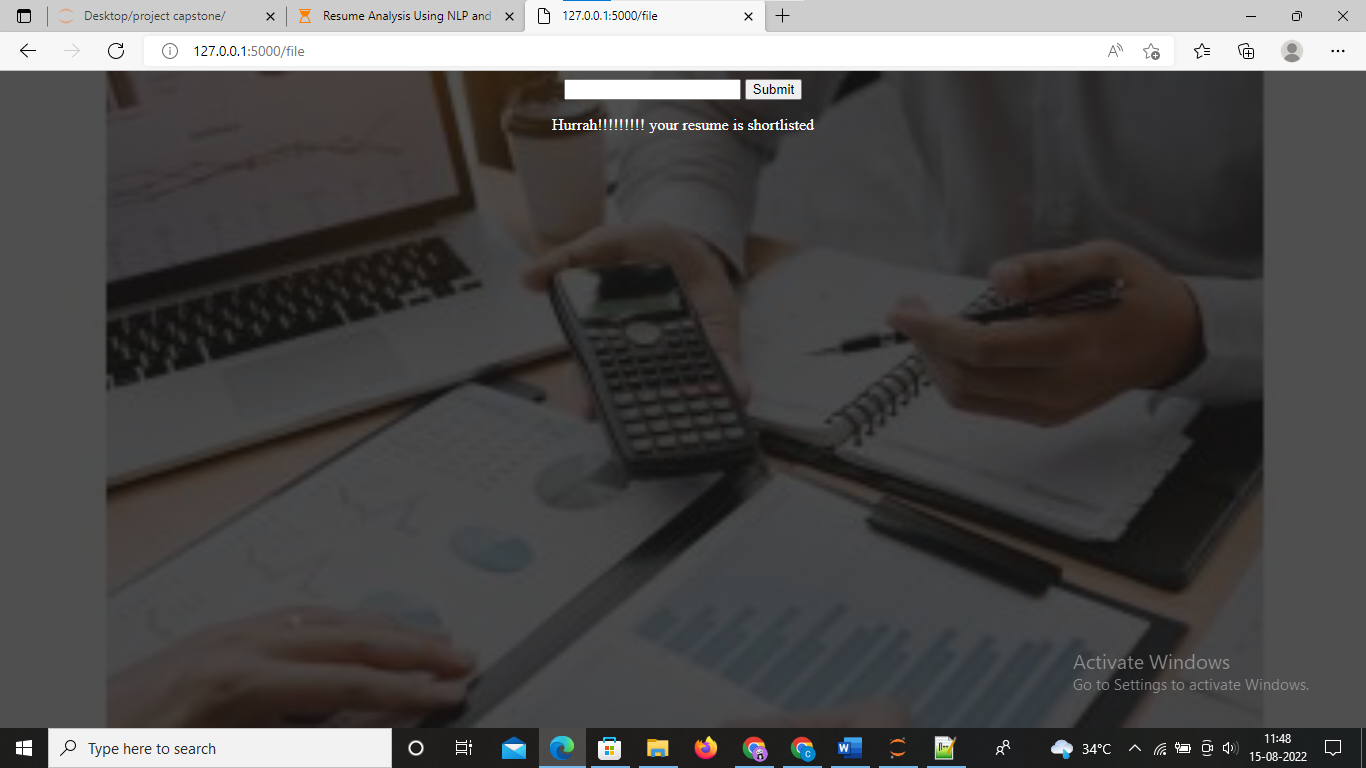